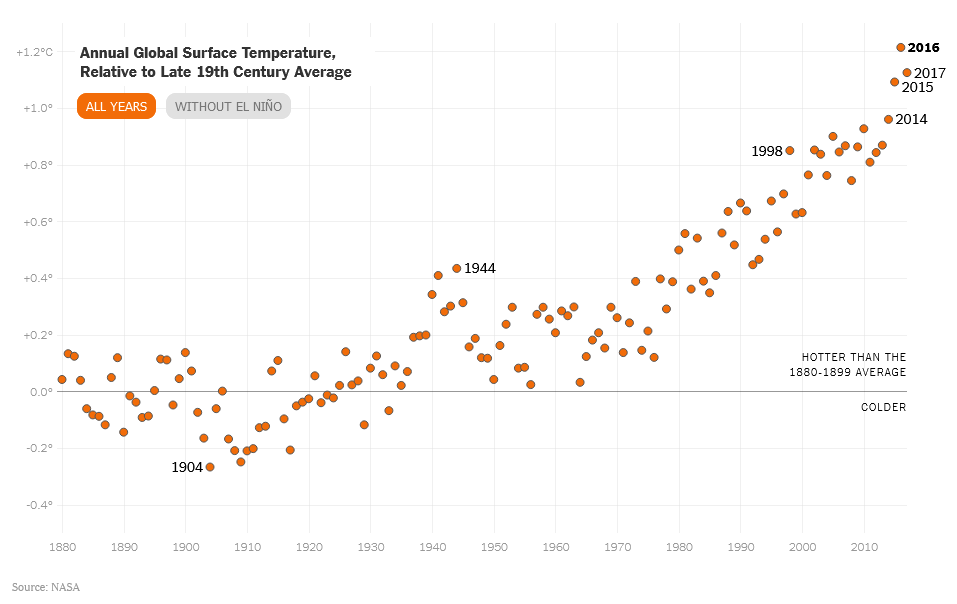

In [1]:
from IPython.display import Image
Image(filename='nyt.png') 

In [2]:
import pandas as pd
import altair as alt

In [3]:
df = pd.read_csv('./GLB.Ts_dSST.csv', header=1 )
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23,-0.19,***,***,-0.14,-0.18,-0.20
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.20,-0.21,-0.10,-0.10,-.11,-.18,0.03,-0.09,-0.18
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,-0.24,-0.16,-0.24,-0.10,-.09,.06,-0.10,-0.17,-0.17
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,-0.14,-0.22,-0.16,-0.19,-.20,-.31,-0.16,-0.12,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.30,-0.28,-0.29,-.28,-.13,-0.39,-0.34,-0.27


In [4]:
df["year_mean"] = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)

In [5]:
late19th_avg = df[df["Year"] < 1900]["year_mean"].mean()

In [6]:
late19th_avg

-0.22804166666666664

In [7]:
df["year_mean_rel"] = df["year_mean"] - late19th_avg

In [8]:
late19th_avg_df = pd.DataFrame({'80-90avg': [0]})

In [9]:
width = 900
height = 500

In [10]:
line = alt.Chart(late19th_avg_df).mark_rule().encode( y=alt.Y(field='80-90avg', type = 'quantitative', axis = alt.Axis(tickCount = 10)))

In [11]:
text_above = alt.Chart(late19th_avg_df).mark_text(align='right', lineBreak='\n', dy=-30).encode(text=alt.value("HOTTER THAN THE\n 1880-1899 AVERAGE"), x=alt.value(width), y=alt.Y(field='80-90avg', type = 'quantitative', axis = alt.Axis(tickCount = 10)))
text_below = alt.Chart(late19th_avg_df).mark_text(align='right', lineBreak='\n', dy=10).encode(text=alt.value("COLDER"), x=alt.value(width), y=alt.Y(field='80-90avg', type = 'quantitative', axis = alt.Axis(tickCount = 10)))
text_head = alt.Chart(df).mark_text(fontSize=15, align='left', lineBreak='\n', dy=20, dx=20).encode(text=alt.value("Annual Global Surface Temperature,\n Relative to Late 19th Century Average"), x=alt.value(0), y=alt.value(0))

In [12]:
base = alt.Chart(df).mark_point(color='black',
    fill='#ca4a1c', 
    strokeWidth=1,
    size=60).encode(
    x = alt.X(title = "", field='Year', type = 'quantitative', axis = alt.Axis(tickCount = 14, format = '<4d'), scale = alt.Scale(zero = False)),
    y = alt.Y(title = "", field = 'year_mean_rel', type = 'quantitative', axis = alt.Axis(labelExpr= 'datum.label+ "\u00b0"'))
)

In [13]:
right_labeled_points = df[df["Year"].isin([1944, 2014, 2015, 2017])]
left_labeled_points = df[df["Year"].isin([1904, 1998])]
right_label_bold = df[df["Year"].isin([2016])]

In [14]:
points_with_year_right = alt.Chart(right_labeled_points).mark_point().encode(
    x=alt.X(title = "", field='Year', type = 'quantitative'),
    y=alt.Y(title = "", field = 'year_mean_rel', type = 'quantitative')
).mark_text(
    align='left',
    baseline='middle',
    dx=5,
    fontSize=13, 
).encode(
    x = alt.X(title = "", field='Year', type = 'quantitative'),
    y = alt.Y(title = "", field = 'year_mean_rel', type = 'quantitative'),
    text='Year'
)

points_with_year_bold = alt.Chart(right_label_bold).mark_point().encode(
    x=alt.X(title = "", field='Year', type = 'quantitative'),
    y=alt.Y(title = "", field = 'year_mean_rel', type = 'quantitative')
).mark_text(
    align='left',
    baseline='middle',
    dx=5,
    fontSize=13,
    fontWeight='bold'
).encode(
    x = alt.X(title = "", field='Year', type = 'quantitative'),
    y = alt.Y(title = "", field = 'year_mean_rel', type = 'quantitative'),
    text='Year'
)

points_with_year_left = alt.Chart(left_labeled_points).mark_point().encode(
    x=alt.X(title = "", field='Year', type = 'quantitative'),
    y=alt.Y(title = "", field = 'year_mean_rel', type = 'quantitative')
).mark_text(
    align='right',
    baseline='middle',
    dx=-5,
    fontSize=13, 
).encode(
    x = alt.X(title = "", field='Year', type = 'quantitative'),
    y = alt.Y(title = "", field = 'year_mean_rel', type = 'quantitative'),
    text='Year'
)

In [21]:
alt.layer(line,
          text_above,
          text_below,
          text_head,
          base,
          points_with_year_right,
          points_with_year_left,
          points_with_year_bold).properties(width = width,
                                            height = height,
                                            background = '#F9F9F9',
                                            padding = 25)

alt.LayerChart(...)